In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from tqdm import tqdm
import torchvision.datasets as dset
import pickle
#import torchvision.utils as vutils


plt.ion()   # interactive mode

In [3]:
def get_same_index(target, label):
    label_indices = []

    for i in range(len(target)):
        if target[i] == label:
            label_indices.append(i)

    return label_indices
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5,0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    #inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
def save_obj(obj, name ):                                                                         
    with open(name + '.pkl', 'wb') as f:                                                          
        pickle.dump(obj, f)                                                                       
        #pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)                                             
def load_obj(name ):                                                                              
    with open(name + '.pkl', 'rb') as f:                                                          
        return pickle.load(f)             

In [4]:
data_dir = '/home/doli/datasets/cifar10/'
dataset_train = dset.CIFAR10(root=data_dir, download=True, train = True 
                             #transform=transforms.Compose([
                              #  transforms.ToTensor(),
                                #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
                            )
dataset_test = dset.CIFAR10(root=data_dir, download=True, train = False
                         #transform=transforms.Compose([
#                                 transforms.Resize(224),
#                                 transforms.Grayscale(num_output_channels=3),
                           #     transforms.ToTensor(),
                                #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                           )
    
assert dataset_train
dataloaders = {'train': torch.utils.data.DataLoader(dataset_train, batch_size=64,
                                          shuffle=False, num_workers=int(10)),
               'val': torch.utils.data.DataLoader(dataset_test, batch_size=64,
                                          shuffle=False, num_workers=int(10)),
              }

dataset_sizes = {'train':len(dataset_train), 'val':len(dataset_test)}
print(dataset_sizes)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified
Files already downloaded and verified
{'train': 50000, 'val': 10000}


In [5]:
progress = tqdm(dataloaders["train"]) 
subset_label = range(10)
for the_label in subset_label:
    subset = []
    for i_batch, batch in enumerate(progress):
        idx = get_same_index(target=batch[1], label = the_label)
        subset.append(batch[0][idx])
    subset = torch.cat(subset, dim = 0)
    save_obj(obj=subset, name=data_dir + "classSets/"+"subset{}".format(the_label))
    

  0%|          | 0/782 [00:00<?, ?it/s]

TypeError: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 232, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 232, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 234, in default_collate
    raise TypeError((error_msg.format(type(batch[0]))))
TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.Image.Image'>


In [15]:
dataloaders["train"]

In [5]:
stack_set = torch.cat(subset, dim = 0)

TypeError: cat(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

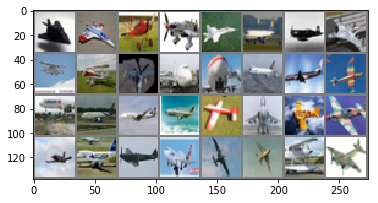

In [31]:
stack_set.size()
out = torchvision.utils.make_grid(stack_set[:32])
imshow(out)

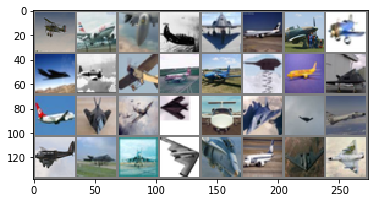

In [32]:
out = torchvision.utils.make_grid(stack_set[32:64])
imshow(out)

In [17]:
subset = load_obj(data_dir+"classSets/subset5")

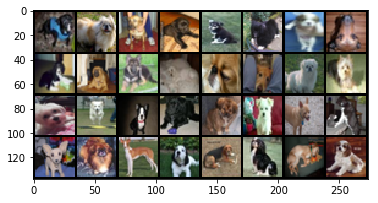

In [18]:
out = torchvision.utils.make_grid(subset[:32])
imshow(out)

In [13]:
len(subset)

5000

In [14]:
dataloader = torch.utils.data.DataLoader(subset, batch_size=64,
                                          shuffle=False, num_workers=int(10))

In [15]:
x = next(iter(dataloader))

In [16]:
x.size()

torch.Size([64, 3, 32, 32])

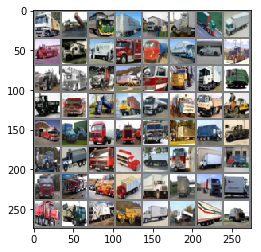

In [17]:
out = torchvision.utils.make_grid(x)
imshow(out)